In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
import os
os.chdir('/content/drive/MyDrive/')


In [ ]:
!pwd

/content


In [ ]:
Image('photo.jpg')


NameError: ignored

<IPython.core.display.Javascript object>

Saved to photo.jpg


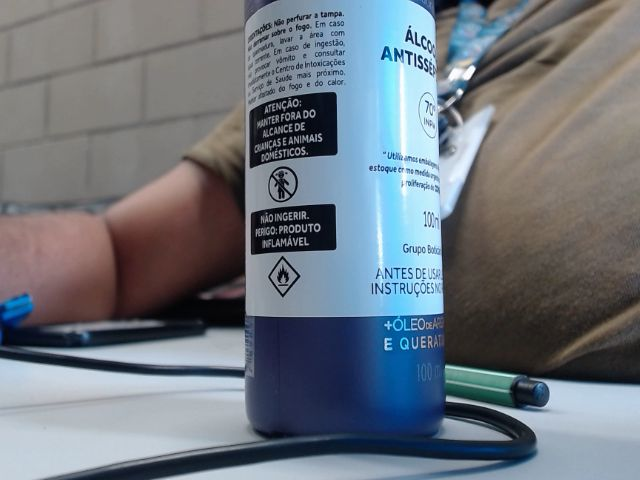

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  filename
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install pytesseract
!pip install tesseract-ocr
! apt install tesseract-ocr
! apt install libtesseract-dev

In [ ]:
import cv2
import sys
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'

In [ ]:
from PIL import Image
import pytesseract

img = r"/content/drive/MyDrive/photo.jpg"
# Read image path from command line
imPath = '/content/drive/MyDrive/photo.jpg'
#img = 'photo.jpg'
# Uncomment the line below to provide path to tesseract manually
#pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Define config parameters.
# '-l eng'  for using the English language
# '--oem 1' for using LSTM OCR Engine
#config = ('-l eng --oem 1 --psm 3')

# Read image from disk
im = cv2.imread(imPath, cv2.IMREAD_COLOR)

# Run tesseract OCR on image
text = pytesseract.image_to_string(img)

# Print recognized text
#print(text)

TesseractError: ignored

In [ ]:
print(im)

In [ ]:
img = r"/content/drive/MyDrive/photo.jpg"
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

print(pytesseract.image_to_string(img))

TesseractNotFoundError: ignored